In [1]:
import pandas
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn import svm
import numpy as np
import time
from time import sleep
from sklearn import tree
import sys, select
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


# setup figure
plt.figure(figsize=(10, 8))

#Define the number of components in the PCA
pca = PCA(n_components=30)

#Initiate the models and the fit parameter value to 10
rfc_clf = RandomForestClassifier(n_estimators=10)
clf = svm.SVC(kernel = 'rbf') #Here rbf kernel is used for SVM 
fit_param = 10
clf_tree = tree.DecisionTreeClassifier()


col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


feature_name = ["normal","X11","IRC","tcp","udp","icmp","OTH","REJ","RSTO","RSTS0","RSTR","S0","S1","S2","S3","SF","SH"]
numeric_value = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
print ("Decision Tree Implementation")


Decision Tree Implementation


Sample Data before preprocessing
Count of 10% data  duration                       4898431
protocol_type                  4898431
service                        4898431
flag                           4898431
src_bytes                      4898431
dst_bytes                      4898431
land                           4898431
wrong_fragment                 4898431
urgent                         4898431
hot                            4898431
num_failed_logins              4898431
logged_in                      4898431
num_compromised                4898431
root_shell                     4898431
su_attempted                   4898431
num_root                       4898431
num_file_creations             4898431
num_shells                     4898431
num_access_files               4898431
num_outbound_cmds              4898431
is_host_login                  4898431
is_guest_login                 4898431
count                          4898431
srv_count                      4898431
serror_rate 

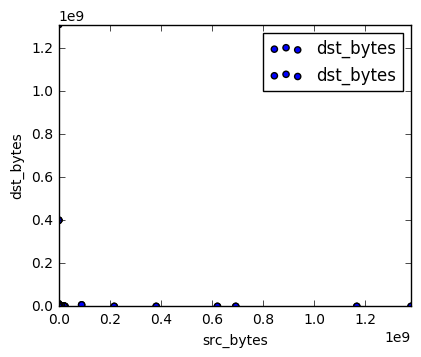

duration                       1074992
protocol_type                  1074992
service                        1074992
flag                           1074992
src_bytes                      1074992
dst_bytes                      1074992
land                           1074992
wrong_fragment                 1074992
urgent                         1074992
hot                            1074992
num_failed_logins              1074992
logged_in                      1074992
num_compromised                1074992
root_shell                     1074992
su_attempted                   1074992
num_root                       1074992
num_file_creations             1074992
num_shells                     1074992
num_access_files               1074992
num_outbound_cmds              1074992
is_host_login                  1074992
is_guest_login                 1074992
count                          1074992
srv_count                      1074992
serror_rate                    1074992
srv_serror_rate          

/home/bhanu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bhanu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bhanu/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

Sample data after Normalisation
   duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0       0.0            0.0  0.588235   0.9  1.558012e-07  3.441080e-05   0.0   
1       0.0            0.0  0.588235   0.9  1.173944e-07  3.456654e-06   0.0   
2       0.0            0.0  0.588235   0.9  1.710190e-07  9.374494e-07   0.0   

   wrong_fragment  urgent  hot  ...    dst_host_srv_count  \
0             0.0     0.0  0.0  ...              0.000000   
1             0.0     0.0  0.0  ...              0.003922   
2             0.0     0.0  0.0  ...              0.007843   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                          0.0   
1                          1.0                          0.0   


In [2]:


def preprocessing():
    kdd_data_10percent = pandas.read_csv("/home/bhanu/Desktop/kddcup.data", header=None, names = col_names)
    print ("Sample Data before preprocessing")
    #print (kdd_data_10percent[:3])
    #kdd_data_10percent = kdd_data_10percent[:3b0000]
    print ("Count of 10% data ",kdd_data_10percent.count())
    #Removing the duplicates
    kdd_data_10percent.drop_duplicates(inplace = True)
    # scatter plot of balance (x) and income (y)
    ax1 = plt.subplot(221)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    cm_blue = ListedColormap(['#0000FF', '#0000FF'])
    ax1.scatter(kdd_data_10percent.src_bytes, kdd_data_10percent.dst_bytes, c=(kdd_data_10percent.label == 'normal'), cmap=cm_bright)
    ax1.scatter(kdd_data_10percent.src_bytes, kdd_data_10percent.dst_bytes, c=(kdd_data_10percent.label != 'normal'), cmap=cm_blue)
    ax1.set_xlim((kdd_data_10percent.src_bytes.min(), kdd_data_10percent.src_bytes.max()))
    ax1.set_ylim((kdd_data_10percent.dst_bytes.min(),kdd_data_10percent.dst_bytes.max()))
    ax1.set_xlabel('src_bytes')
    ax1.set_ylabel('dst_bytes')
    ax1.legend(loc='upper right') 
    plt.show()
    print (kdd_data_10percent.count())
    label_set = set(kdd_data_10percent['label'])
    label_list = list(label_set)
    print (label_list)
    label_len = len(label_list)
    print ("Length of label list is: ",label_len)
    myset = set(kdd_data_10percent['service'])   #Find all the unique elements using set function
    results = list(myset)
    x = len(results)
    print ("Len of resulst = ",x)
    print (results)
    xyz = 0
    #replacing protocls with particular numbers
    while xyz != 17 :      
        kdd_data_10percent = kdd_data_10percent.replace({feature_name[xyz]:numeric_value[xyz]}, regex=True)
        xyz = xyz+1
    z = 18
    #replacing services with numerical values
    for y in range (0,x):
        try:
            print ("Y:",y)
            print ("Results[y]:",results[y])
            kdd_data_10percent['service'] = kdd_data_10percent['service'].replace({results[y]:z}, regex=True)
        except:
            print ("Y2:",y)
            print ("Failed with block") #clear,feature_name[y]
        z = z+1
    print ("Sample data after transformation")
    #print (kdd_data_10percent[:3])
    print ("Test-2")
    for xy in range (0,label_len):
        #print "XY: ",xy,"\n"
        kdd_data_10percent['label'] = kdd_data_10percent['label'].replace({label_list[xy]:1}, regex=True)
    features = kdd_data_10percent[col_names].astype(float)            #conerting data to float for SVM
    features = features.apply(lambda x: MinMaxScaler().fit_transform(x))  #normalising data
    print ("Sample data after Normalisation")
    print (features[:3])
    kdd_data_10percent.to_csv(r'/home/bhanu/Desktop/no_dup_train', header=None, index=None, sep=',', mode='a') #saving numeric data
    features.to_csv(r'/home/bhanu/Desktop/no_dup_scaled_train', header=None, index=None, sep=',', mode='a')  #saving normalised data
    #print (features['label'].value_counts())
    return

option = 'dt'

preprocessing()
    


    

In [1]:



def train():
    print ("Reached train")
    train_data = pandas.read_csv('/home/bhanu/Desktop/no_dup', header=None, names = col_names)
    X = train_data.drop('label',axis=1)
    y = train_data['label']
    #clf = svm.SVC(kernel = 'rbf')
    X = pca.fit_transform(X) 
    print ("Done with fit parameters")
    if option == 'dt':
        clf_tree.fit(X, y)
    elif option == 'svm':
        print ("SVM Fit Called")
        clf.fit(X, y)
        print ("SVM fit worked")
    elif option == 'rfc':
        rfc_clf.fit(X,y)
        print ("RFC fit done")
    else:
        print ("Invalid entry")
        return train()
    return

train()


def test_function():
    test_data = pandas.read_csv('/home/bhanu/Desktop/no_dup_train', header=None, names = col_names)
    test_data = test_data[:]
    test_1 = test_data['label']
    print (test_1.value_counts())
    actualnp = np.array(test_1)
    test_data = test_data.drop('label',axis=1)
    test_data = pca.transform(test_data)
    #test_data = test_data.as_matrix(columns=test_data.columns[:])#test_2 = svm_test(test_data)
    if option == 'dt':
        test_2 = clf_tree.predict(test_data)
    elif option == 'rfc':
        test_2 = rfc_clf.predict(test_data)
    elif option =='svm':
        test_2 = clf.predict(test_data)
    #clf.predict(test_data)
    predictednp = np.array(test_2)
    final = (actualnp == predictednp)
    test_3 = pandas.DataFrame(final,columns = ['test'])
    test_3 = test_3['test']
    print ("Results: \n",test_3.value_counts())
    return test_3.value_counts()

df = pandas.DataFrame(columns = ('C','True','False','Accuracy','Time'))


start_time = time.time()
#,C = j,gamma = 5) 
print ("Classifier Defined")
train()
print ("Trained")
a = test_function()
print ("Tested")
accuracy_1 = (float(a[1])*100/float(a[0]+a[1]))
print ("Accuracy = ",accuracy_1)
c = time.time() - start_time
print ("Time = ",c)

# while j<10:
# 	start_time = time.time()
# 	print "\nValue of C is: ", j 
# 	clf = svm.SVC(kernel = 'rbf')#,C = j,gamma = 5) 
# 	print "Classifier Defined"
# 	train()
# 	a = test_function()
# 	j_norm = j/5
	
# 	accuracy_1 = (float(a[1])*100/float(a[0]+a[1]))
# 	print "Accuracy = ",accuracy_1
# 	j = j+5
# 	c = time.time() - start_time
# 	df.loc[j_norm] =  [j,a[1],a[0],accuracy_1,c]
# 	print "Time = ",c



Reached train


NameError: name 'pandas' is not defined